MÉTRICAS

In [1]:
import numpy as np
import cv2
from skimage.filters import apply_hysteresis_threshold
from skimage.filters import frangi, hessian,prewitt, roberts, sobel, prewitt_h, prewitt_v
from skimage.filters import gabor, gaussian, laplace, median, meijering
from skimage.filters import rank_order,threshold_local,threshold_niblack
from skimage.filters import threshold_otsu,threshold_sauvola,threshold_triangle
from skimage.filters import threshold_yen, unsharp_mask, wiener
from skimage.restoration import denoise_nl_means, denoise_bilateral,unsupervised_wiener, unwrap_phase
from skimage.restoration import denoise_tv_bregman, denoise_tv_chambolle, denoise_wavelet
from skimage.restoration import estimate_sigma, richardson_lucy
from skimage import filters
from skimage.metrics import adapted_rand_error, contingency_table, mean_squared_error, peak_signal_noise_ratio
from skimage.metrics import structural_similarity, variation_of_information
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from skimage import exposure

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

from skimage.data import chelsea, hubble_deep_field
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.restoration import (calibrate_denoiser,
                                 denoise_wavelet,
                                 denoise_tv_chambolle, denoise_nl_means,
                                 estimate_sigma)
from skimage.util import img_as_float, random_noise
from skimage.color import rgb2gray
from functools import partial

from skimage.restoration.j_invariant import _invariant_denoise

In [2]:
imagen = cv2.imread("tests/lena1000p.jpg", cv2.IMREAD_GRAYSCALE)

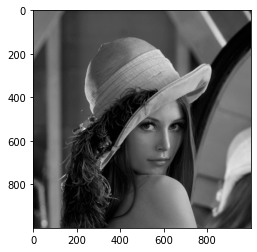

In [4]:
plt.imshow(imagen, cmap='gray')
plt.show()

In [5]:
#esto nos da la info de la imagen
info = np.iinfo(imagen.dtype)
info

iinfo(min=0, max=255, dtype=uint8)

In [8]:
#este método nos permite pasar de float a uint8
from skimage import img_as_ubyte 

img = img_as_ubyte(imagen)

In [6]:
#para estimar el sigma de una imagen
sigma_imagen = estimate_sigma(imagen, multichannel=False)

In [8]:
#metricas-----------------------------------------------

In [29]:
primer_metrica = adapted_rand_error(image_true=imagen, image_test=imagen_filtrada)
primer_metrica

(0.8058319929518057, 0.22986635594410373, 0.16806710909865075)

In [30]:
segunda_metrica = mean_squared_error(imagen_filtrada, imagen)
segunda_metrica

93.19631421199031

In [31]:
tercer_metrica = peak_signal_noise_ratio(imagen,imagen_filtrada)
tercer_metrica

28.436816239328856

In [34]:
cuarta_metrica = structural_similarity(imagen,imagen_filtrada)
cuarta_metrica

0.681993957623166

In [ ]:
#--------------------------------------

In [ ]:
#optimización de filtros--------------------------

In [9]:
sigma = 0.4
noisy = random_noise(imagen, mode='speckle', var=sigma ** 2)

In [10]:
#método denoise_tv_chambolle
parameter_ranges_tv = {'weight': np.arange(0.01, 0.3, 0.02)}
_, (parameters_tested_tv, losses_tv)=calibrate_denoiser(
                                     noisy,
                                     denoise_tv_chambolle,
                                     denoise_parameters=parameter_ranges_tv,
                                     extra_output=True)

print(f'Minimum self-supervised loss TV: {np.min(losses_tv):.4f}')

best_parameters_tv = parameters_tested_tv[np.argmin(losses_tv)]

denoised_calibrated_tv = _invariant_denoise(noisy, denoise_tv_chambolle,
                                             denoiser_kwargs=best_parameters_tv)

denoised_default_tv = denoise_tv_chambolle(noisy, **best_parameters_tv)

psnr_calibrated_tv = peak_signal_noise_ratio(imagen, img_as_ubyte(denoised_calibrated_tv))
psnr_default_tv = peak_signal_noise_ratio(imagen, img_as_ubyte(denoised_default_tv))
print(psnr_calibrated_tv)
print(psnr_default_tv)

Minimum self-supervised loss TV: 0.0219
30.21186251505512
30.35476296948414


In [18]:
ssim_calibrated_tv = structural_similarity(imagen, img_as_ubyte(denoised_calibrated_tv))
ssim_default_tv = structural_similarity(imagen, img_as_ubyte(denoised_default_tv))
print(ssim_calibrated_tv)
print(ssim_default_tv)

0.793618796927488
0.8029837216703822


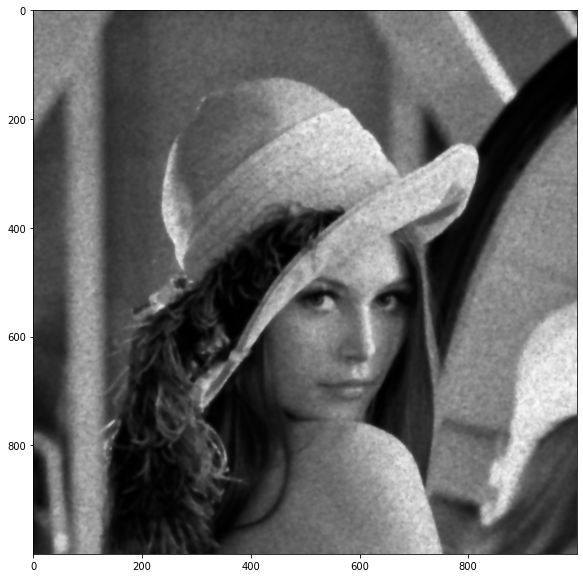

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(denoised_calibrated_tv, cmap='gray')
plt.show()


In [12]:
#método _denoise_wavelet

parameter_ranges_wavelet = {'sigma': np.arange(0.01, 0.3, 0.03)}
_, (parameters_tested_wavelet, losses_wavelet) = calibrate_denoiser(
                                                noisy,
                                                denoise_wavelet,
                                                parameter_ranges_wavelet,
                                                extra_output=True)
print(f'Minimum self-supervised loss wavelet: {np.min(losses_wavelet):.4f}')

best_parameters_wavelet = parameters_tested_wavelet[np.argmin(losses_wavelet)]

denoised_calibrated_wavelet = _invariant_denoise(
        noisy, denoise_wavelet,
        denoiser_kwargs=best_parameters_wavelet)

denoised_default_wavelet = denoise_wavelet(noisy, **best_parameters_wavelet, rescale_sigma = True)

psnr_calibrated_wavelet = peak_signal_noise_ratio(imagen, img_as_ubyte(denoised_calibrated_wavelet))
psnr_default_wavelet = peak_signal_noise_ratio(imagen, img_as_ubyte(denoised_default_wavelet))
print(psnr_calibrated_wavelet)
print(psnr_default_wavelet)

/home/jere/.local/lib/python3.6/site-packages/skimage/restoration/j_invariant.py:135: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  output[mask] = denoise_function(input_image, **denoiser_kwargs)[mask]


Minimum self-supervised loss wavelet: 0.0225
28.403435852913237
28.49273538274779


In [20]:
ssim_calibrated_wavelet = structural_similarity(imagen, img_as_ubyte(denoised_calibrated_wavelet))
ssim_default_wavelet = structural_similarity(imagen, img_as_ubyte(denoised_default_wavelet))
print(ssim_calibrated_wavelet)
print(ssim_default_wavelet)

0.7200646167159507
0.7337006445099127


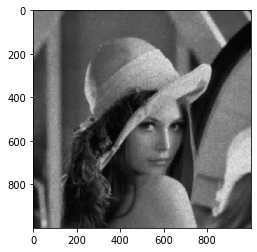

In [13]:
#plt.figure(figsize=(5,5))
plt.imshow(denoised_calibrated_wavelet, cmap='gray')
plt.show()

In [14]:
#método denoise_nl_means

sigma_est = estimate_sigma(imagen)

parameter_ranges_nl = {'sigma': np.arange(0.01, 0.3, 0.05),
                       'patch_size': np.arange(14,16),
                       'patch_distance': np.arange(19,21),
                       'h': np.arange(0.1,0.2,0.05)}
_, (parameters_tested_nl, losses_nl) = calibrate_denoiser(noisy,
                                                        denoise_nl_means,
                                                        parameter_ranges_nl,
                                                        extra_output=True)

print(f'Minimum self-supervised loss NL means: {np.min(losses_nl):.4f}')

best_parameters_nl = parameters_tested_nl[np.argmin(losses_nl)]

denoised_calibrated_nl = _invariant_denoise(noisy, denoise_nl_means,
                                            denoiser_kwargs=best_parameters_nl)

denoised_default_nl = denoise_nl_means(noisy, **best_parameters_nl)

psnr_calibrated_nl = psnr(imagen, img_as_ubyte(denoised_calibrated_nl))
psnr_default_nl = psnr(imagen, img_as_ubyte(denoised_default_nl))
print(psnr_calibrated_nl)
print(psnr_default_nl)

Minimum self-supervised loss NL means: 0.0225
27.95463167025213
27.4145657053365


In [21]:
ssim_calibrated_nl = structural_similarity(imagen, img_as_ubyte(denoised_calibrated_nl))
ssim_default_nl = structural_similarity(imagen, img_as_ubyte(denoised_default_nl))
print(ssim_calibrated_nl)
print(ssim_default_nl)

0.7838053265784679
0.754358678157018


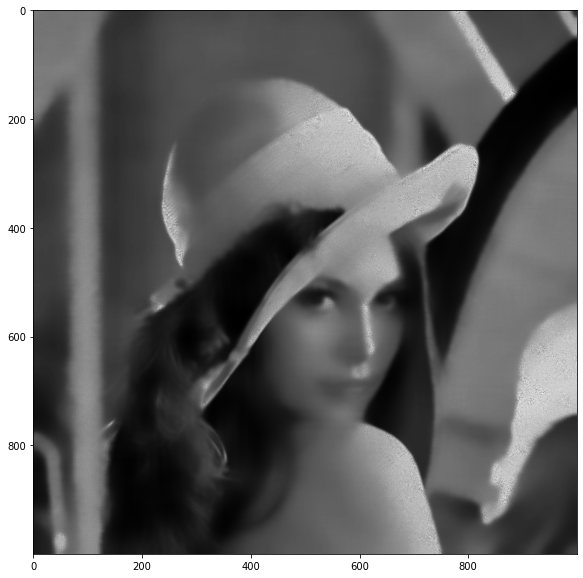

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(denoised_default_nl, cmap='gray')
plt.show()